In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Exploratory Data Analysis

In [36]:
df = pd.read_csv('data.csv')
df=df.rename(columns={"CSUSHPINSA": "housing_price","observation_date": "date"})
df.head()

,date,housing_price
0,1987-01-01,63.755
1,1987-02-01,64.155
2,1987-03-01,64.490
3,1987-04-01,64.995
4,1987-05-01,65.569


In [37]:
df.describe()

,housing_price
count,393.000000
mean,126.874893
std,44.300535
min,63.755000
25%,80.346000
50%,131.841000
75%,166.676000
max,212.203000


In [38]:
df['date']=pd.DatetimeIndex(df['date'])
#df.set_index('date',inplace=True)

In [39]:
df.isnull().sum()

date             0
housing_price    0
dtype: int64

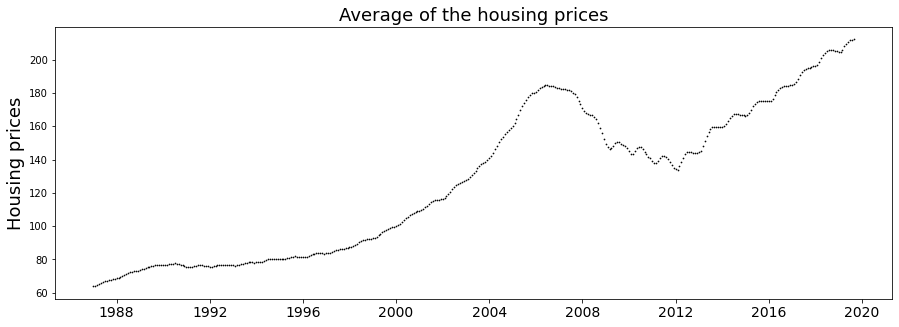

In [41]:
import matplotlib.dates as mdates
def scatplot(x,y,s=0.5):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.scatter(x,y,color='black', s=s)
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    plt.ylabel('Housing prices',fontsize=18)
    plt.title('Average of the housing prices',fontsize=18)
    _=plt.xticks(fontsize=14)
scatplot(df.date,df.housing_price)

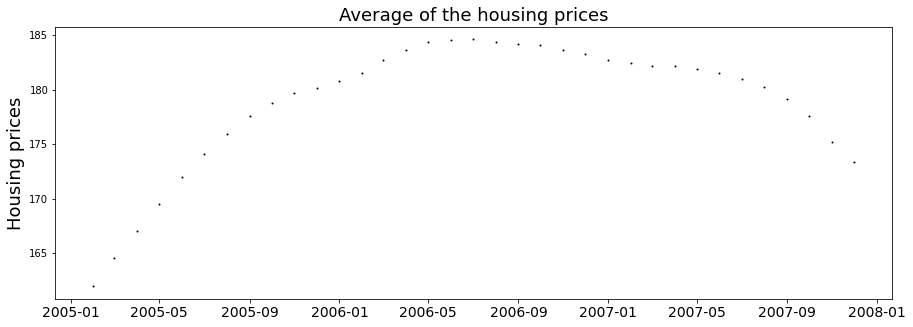

In [98]:
dft = df[(df.date>'2005')&(df.date<'2008')]
scatplot(dft.date,dft.housing_price,s=1)
fig.autofmt_xdate()

In [12]:
from pandas import Series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [13]:
t = difference(df.housing_price)

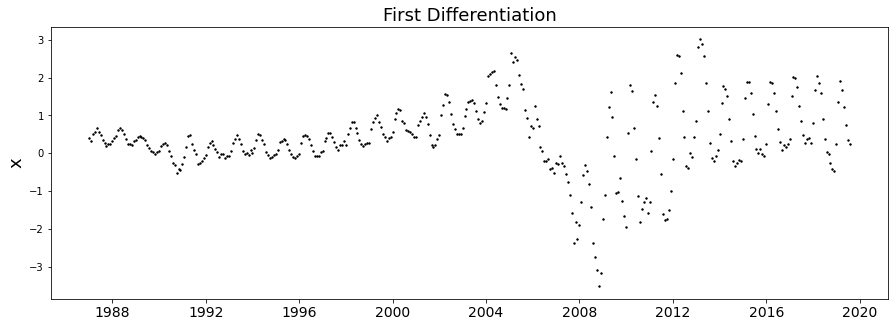

In [16]:
scatplot(df.date[0:392],t,s=2)
plt.ylabel('x',fontsize=18)
_=plt.title('First Differentiation',fontsize=18)

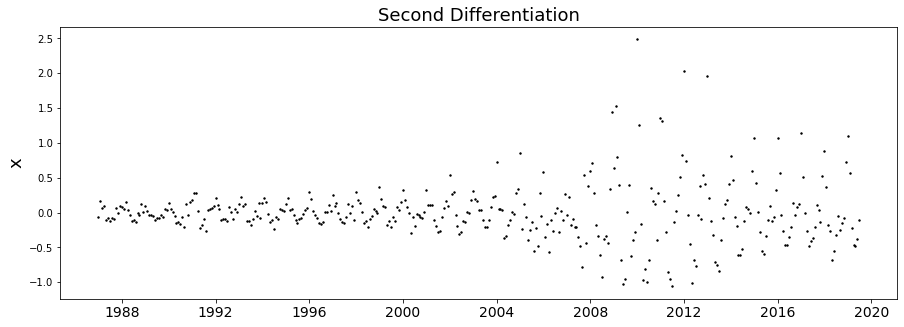

In [17]:
t2 = difference(t)
scatplot(df.date[0:391],t2,s=2)
plt.ylabel('x',fontsize=18)
_=plt.title('Second Differentiation',fontsize=18)

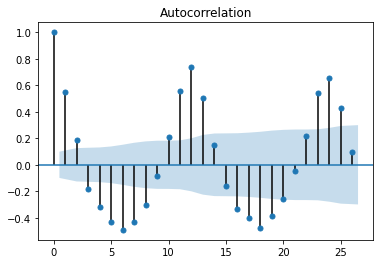

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
plot_acf(t2)
pyplot.show()

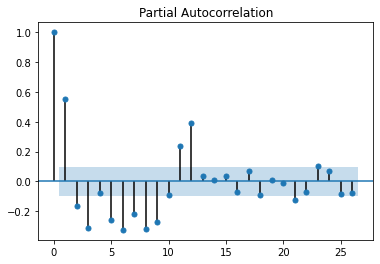

In [21]:
plot_pacf(t2); pyplot.show()

In [42]:
df.set_index('date',inplace=True)

In [44]:
y = df.housing_price

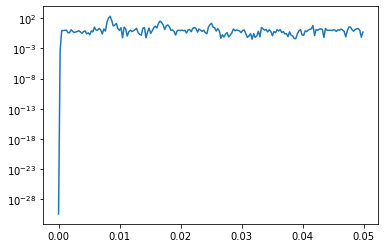

In [27]:
# from scipy.signal import periodogram
# f, Pxx_den = periodogram(t2,fs = 0.1)
# plt.semilogy(f, Pxx_den)

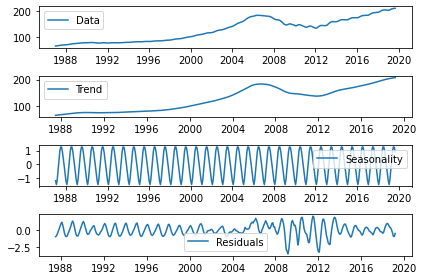

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'Data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [48]:
from statsmodels.tsa.stattools import kpss
y = df.housing_price
kpss(y)
y_log = np.log(y)
y_log.plot()

In [55]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
def evaluate_arima_model(data,arima_order):
    split = int(len(data)*0.8)
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    predictions = list()
    for i in test:#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(i)
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error


In [64]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [131]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values= [x for x in range(0, 3)]

In [ ]:
y1 = y.diff()
y2 = y1.diff()
y2_log = np.log(y2)
y2.plot()
y2.dropna(inplace=True)
y2_log = np.log(y2)
y2_log.dropna(inplace=True)

In [205]:
evaluate_models(y2, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.255
ARIMA(0, 0, 1) MSE=0.176
ARIMA(0, 0, 2) MSE=0.146
ARIMA(0, 1, 0) MSE=0.198
ARIMA(0, 1, 1) MSE=0.203
ARIMA(0, 1, 2) MSE=0.216
ARIMA(0, 2, 0) MSE=0.387
ARIMA(0, 2, 1) MSE=0.199
ARIMA(0, 2, 2) MSE=0.205
ARIMA(1, 0, 0) MSE=0.161
ARIMA(1, 0, 1) MSE=0.157
ARIMA(1, 0, 2) MSE=0.162
ARIMA(1, 1, 0) MSE=0.203
ARIMA(1, 2, 0) MSE=0.310
ARIMA(2, 0, 0) MSE=0.153
ARIMA(2, 0, 1) MSE=0.114
ARIMA(2, 0, 2) MSE=0.090
ARIMA(2, 1, 0) MSE=0.204
ARIMA(2, 2, 0) MSE=0.301
Best ARIMA(2, 0, 2) MSE=0.090


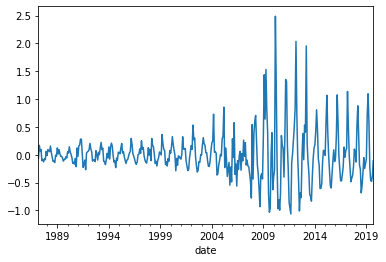

In [204]:
y2.plot()

In [206]:
p=2
d=0
q=2
model = ARIMA(y2, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

In [207]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          housing_price   No. Observations:                  391
Model:                     ARMA(2, 2)   Log Likelihood                 -60.464
Method:                       css-mle   S.D. of innovations              0.281
Date:                Wed, 14 Oct 2020   AIC                            132.928
Time:                        15:31:32   BIC                            156.740
Sample:                    03-01-1987   HQIC                           142.366
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0009      0.011      0.085      0.932      -0.020       0.022
ar.L1.housing_price     1.7219      0.007    238.278      0.000       1.708       1.736
ar.L2.housing_price    -0.9898      0.007   -143.810      0.000      -1.003      -0.976
ma.L1.housing_price    -1.6850      0.028    -59.795      0.000      -1.740      -1.630
ma.L2.housing_price     0.8885      0.035     25.711      0.000       0.821       0.956
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8698           -0.5037j            1.0051           -0.0835
AR.2            0.8698           +0.5037j            1.0051            0.0835
MA.1            0.9482           -0.4758j            1.0609           -0.0740
MA.2            0.9482           +0.4758j            1.0609            0.0740
-----------------------------------------------------------------------------
"""

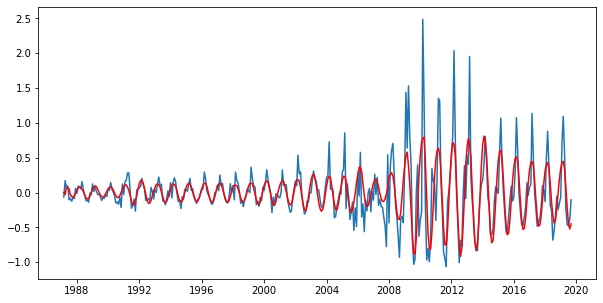

In [209]:
plt.figure(figsize=(10,5))
plt.plot(y2)
plt.plot(model_fit.predict(), color = 'red')

In [214]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = len(forecast[0])
date_range = pd.date_range(y2.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_months = pd.DataFrame(date_range, columns = ['Month'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)
future_months['Prediction'] = forecast[0]


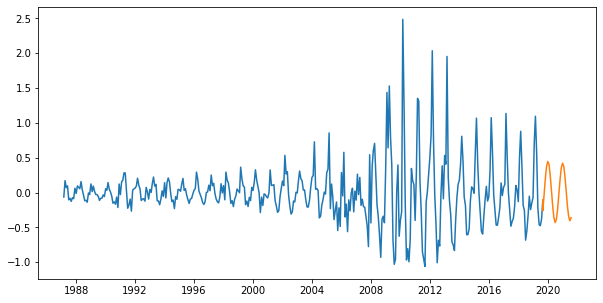

In [227]:
plt.figure(figsize=(10,5))
plt.plot(y2)
plt.plot(y2['Sep 2019'].append(future_months['Prediction']))
plt.show()

In [228]:
forecast[0]

array([-0.26080714, -0.03766756,  0.19354404,  0.37079154,  0.44712943,
        0.40312863,  0.25180281,  0.0347915 , -0.18908844, -0.35977769,
       -0.43208017, -0.38762246, -0.23950429, -0.02846841,  0.1882976 ,
        0.35265218,  0.42108875,  0.37624466,  0.23128779,  0.02607776,
       -0.18378601, -0.34202239, -0.40675622, -0.36159246])

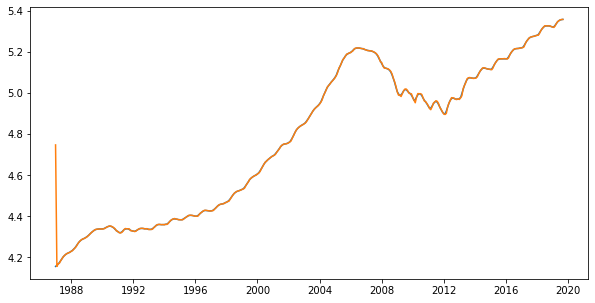

In [232]:
p=2
d=0
q=2
model = ARIMA(y_log, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)
plt.figure(figsize=(10,5))
plt.plot(y_log)
plt.plot(model_fit.predict())

In [ ]:
forecast_period = len(forecast[0])
date_range = pd.date_range(y2.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_months = pd.DataFrame(date_range, columns = ['Month'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)
future_months['Prediction'] = forecast[0]